In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# b.

In [2]:
print("Part b")
#Given Initialization
sigma = np.array([[2, 1], [1, 3]])
mean = np.array([2, 1])

Part b


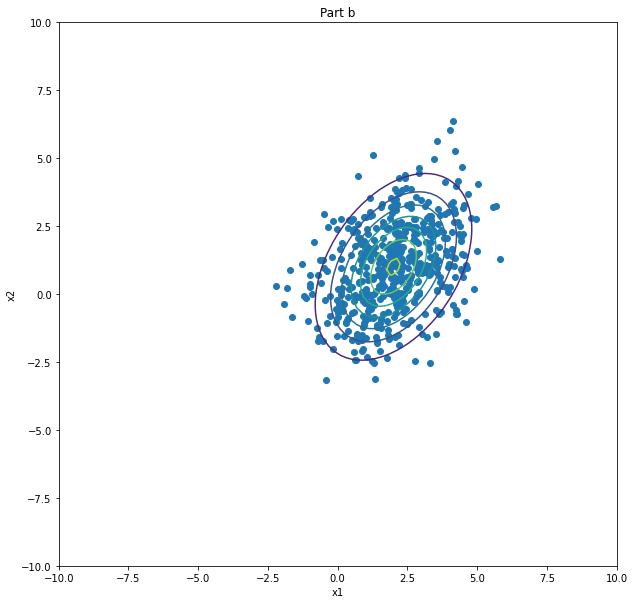

In [3]:
#for Contour I used meshgrid
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(xlist, ylist)
#I'm getting the probability for each point in the meshgrid (calculating the pdf)
pos = np.array([Y,X]).T
rv = st.multivariate_normal(mean, sigma)
sample = rv.rvs(500)
Z = rv.pdf(pos)
#Plotting the samples and contour
plt.figure(figsize = (10,10))
plt.contour(X, Y, Z)
plt.ylabel("x2")
plt.xlabel("x1")
plt.scatter(sample[:,0], sample[:,1])
plt.title("Part b")
plt.show()

# f.

In [4]:
print("Part f")
#Calculating the mean and covariance matrix of the samples from part b
s_mean1 = np.mean(sample, axis = 0)
s_cov1 = np.cov(sample.T)
print("Mean:\n",s_mean1)
print("Covariance:\n",s_cov1)

Part f
Mean:
 [1.98500879 1.0133911 ]
Covariance:
 [[2.0422506  0.82881423]
 [0.82881423 2.65669136]]


# g.

In [5]:
print("Part g")
#Stacking them upon one another and calculating eigenvals and eigenvecs and printed the eigenvals in the way that
#was asked in the question
sigmaall = np.stack((sigma, s_cov1), axis = 0)
eigenvalg, eigenvecg = np.linalg.eig(sigmaall)
print("V:\n",eigenvalg.T)

Part g
V:
 [[1.38196601 1.46554938]
 [3.61803399 3.23339258]]


# h.

Part h
Transformation Matrix:
 [[ 0.76084521 -0.14530851]
 [-0.14530851  0.61553671]]
New Covariance:
 [[ 1.05506111 -0.05775028]
 [-0.05775028  0.9014401 ]]


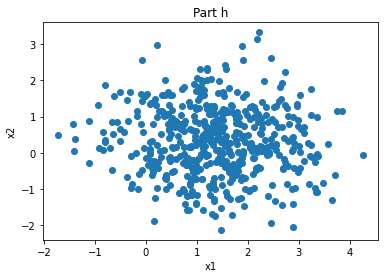

In [6]:
print("Part h")
#Whitening with eigenvalues and eigenvectors
eigenvalsig, eigenvecsig = np.linalg.eig(sigma)
hmatrix = eigenvecsig.dot(np.diag(np.sqrt(eigenvalsig))).dot(eigenvecsig.T) 
hmatrix = np.linalg.inv(hmatrix)
print("Transformation Matrix:\n",hmatrix)
newsample = np.dot(sample, hmatrix)
print("New Covariance:\n",np.cov(newsample.T))

#Plotting the transformed samples
plt.ylabel("x2")
plt.xlabel("x1")
plt.scatter(newsample[:,0], newsample[:,1])
plt.title("Part h")
plt.show()

# i.

Part i
Eigenvalues of Distribution Part b:
 [1.38196601 3.61803399]
Eigenvectors of Distribution Part b:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


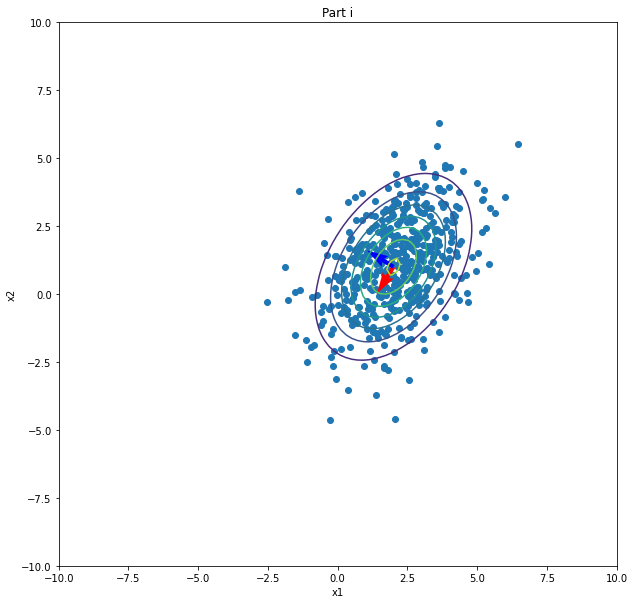

In [8]:
print("Part i")
eigenvali, eigenveci = np.linalg.eig(sigma)
print("Eigenvalues of Distribution Part b:\n",eigenvali)
print("Eigenvectors of Distribution Part b:\n",eigenveci)
plt.figure(figsize = (10,10))
plt.contour(X, Y, Z)
plt.title('')
plt.ylabel("x2")
plt.xlabel("x1")
plt.scatter(sample[:,0], sample[:,1])
plt.quiver(*mean, *eigenveci[:,1], color=['r'])
plt.quiver(*mean, *eigenveci[:,0], color=['b'])
plt.title("Part i")
plt.show()

# j.

Part j
P:
[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]


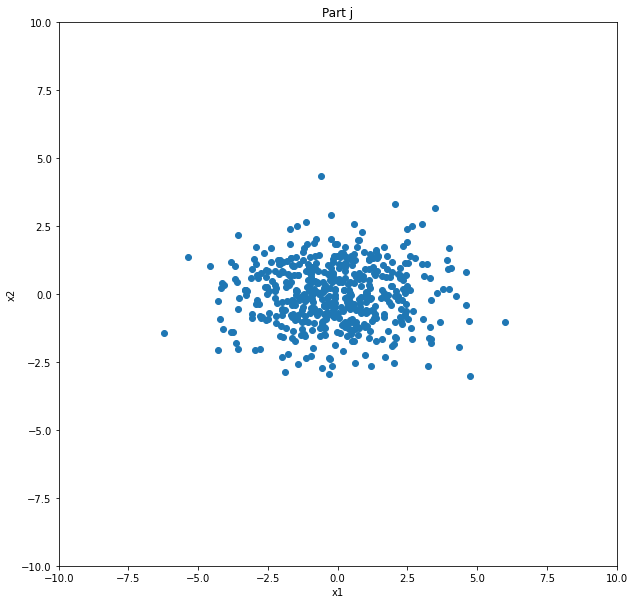

In [9]:
print("Part j")
#Sorting the eigenvectors
p = eigenveci[:,np.argsort(-eigenvali)]
print("P:")
print(p)
#Projecting onto new space
projsample = np.dot((sample-mean), p)
#Plotting the new projected samples
plt.figure(figsize = (10,10))
plt.title('')
plt.ylabel("x2")
plt.xlabel("x1")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(projsample[:,0], projsample[:,1])
plt.title("Part j")
plt.show()

# k.

In [10]:
print("Part k")
#Calculating Covariance for the projected samples
projsample_cov = np.cov(projsample.T)
#Calculating EigenVals and EigenVecs for the projected samples
projeigval, projeigvec = np.linalg.eig(projsample_cov)
print("New Samples Covariance:\n",projsample_cov)
print("New Samples Eigenvalues:\n",projeigval)
print("New Samples Eigenvectors:\n",projeigvec)

Part k
New Samples Covariance:
 [[3.54478429 0.01508118]
 [0.01508118 1.32283865]]
New Samples Eigenvalues:
 [3.54488665 1.32273629]
New Samples Eigenvectors:
 [[ 0.99997697 -0.00678691]
 [ 0.00678691  0.99997697]]
